In [30]:
import pandas as pd
import IPython.display as ipd
import plotly.express as px
import matplotlib.pyplot as plt

lep_author_data = pd.read_csv('authors.leptospirosis.csv')
lep_article_data=pd.read_csv('articles.leptospirosis.csv')

In [31]:
lep_author_data['AUTHOR'] = lep_author_data['AuthorLastname'] + ' ' + lep_author_data['AuthorInitials']

lep_first = lep_author_data[lep_author_data['AuthorN'] == 1]
lep_first_count = lep_first['AUTHOR'].value_counts().reset_index()
lep_first_count.columns = ['Author', 'Count']

lep_other = lep_author_data[lep_author_data['AuthorN'] != 1]
lep_other_count = lep_other['AUTHOR'].value_counts().reset_index()
lep_other_count.columns = ['Author', 'Count']

merged_lep = pd.merge(lep_first_count, lep_other_count, on='Author', how='outer', suffixes=(' First', ' Other')).fillna(0)
merged_lep['Count Sum'] = merged_lep['Count First'] + merged_lep['Count Other']

lep_descending = merged_lep.sort_values(by=['Count Sum'], 
                                        ascending = False, 
                                        ignore_index = True)

lep_top50 = lep_descending.iloc[:30,:]

ipd.display(lep_top50)
lep_top50.to_csv('top50.csv')

,Author,Count First,Count Other,Count Sum
0,Ko AI,1.0,85.0,86.0
1,Picardeau M,6.0,72.0,78.0
2,Lilenbaum W,6.0,71.0,77.0
3,Dellagostin OA,1.0,59.0,60.0
4,Reis MG,0.0,57.0,57.0
5,Vasconcellos SA,0.0,56.0,56.0
6,Hartskeerl RA,2.0,54.0,56.0
7,Koizumi N,14.0,42.0,56.0
8,Costa F,5.0,36.0,41.0
9,Goarant C,4.0,37.0,41.0


In [32]:
list_2=[]

top_index=lep_top50.set_index('Author')
lep_index=lep_author_data.set_index('AUTHOR')
for auth in lep_top50['Author']:
    pand=lep_index.loc[auth]
    list_2.append({'author':auth,'affiliation':pand['AuthorAffiliation']})

affiliation=pd.DataFrame(list_2)
lep_top50.to_csv('affiliation.csv')

In [39]:
list_2

[{'author': 'Ko AI',
  'affiliation': AUTHOR
  Ko AI                                                  NaN
  Ko AI                                                  NaN
  Ko AI                                                  NaN
  Ko AI                                                  NaN
  Ko AI                                                  NaN
                                 ...                        
  Ko AI    Instituto de Pesquisas Gonçalo Moniz, Fundação...
  Ko AI    Laboratório de Patologia e Biologia Molecular,...
  Ko AI    Instituto de Pesquisas Gonçalo Moniz, Fundação...
  Ko AI    Instituto Gonçalo Moniz, Fundação Oswaldo Cruz...
  Ko AI    Department of Epidemiology of Microbial Diseas...
  Name: AuthorAffiliation, Length: 86, dtype: object},
 {'author': 'Picardeau M',
  'affiliation': AUTHOR
  Picardeau M    Unité de Bactériologie Moléculaire et Médicale...
  Picardeau M                                                  NaN
  Picardeau M                               

In [34]:
country_auth=pd.read_csv("top50_country.csv")
country_auth

,Unnamed: 0,Author,Count First,Count Other,Count Sum,Unnamed: 5,country,Count 1,Count 2,Count 3
0,0,Ko AI,1,85,86,NaN,USA,USA 29,Brazil 15,NaN
1,1,Picardeau M,6,72,78,NaN,France,France 50,NaN,NaN
2,2,Lilenbaum W,6,71,77,NaN,Brazil,Brazil 65,NaN,NaN
3,3,Dellagostin OA,1,59,60,NaN,Brazil,Brazil 29,NaN,NaN
4,4,Reis MG,0,57,57,NaN,Brazil,Brazil 26,USA 3,NaN
5,5,Vasconcellos SA,0,56,56,NaN,Brazil,Brazil 23,NaN,NaN
6,6,Hartskeerl RA,2,54,56,NaN,Netherlands,Netherlands 21,NaN,NaN
7,7,Koizumi N,14,42,56,NaN,Japan,Japan 36,Italy 1,NaN
8,8,Costa F,5,36,41,NaN,Brazil,Brazil 22,USA 13,NaN
9,9,Goarant C,4,37,41,NaN,France (new caladonia,France (new caladonia) 28,France 1,Switzerland 1


In [35]:
#make a count for count 1, 2 and 3 
country_count=pd.read_csv("COUNTRY_COUNT.csv")
country_count

,Country,Number
0,New Zeland,59
1,France,118
2,Brazil,334
3,Netherlands,31
4,Japan,36
5,China,52
6,USA,119
7,India,60
8,Australia,36
9,Barbados,5


In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

country=country_count.iloc[:50,:]

fig_1=px.choropleth(country,locations='Country',locationmode="country names",color="Number ")
fig_1.show()

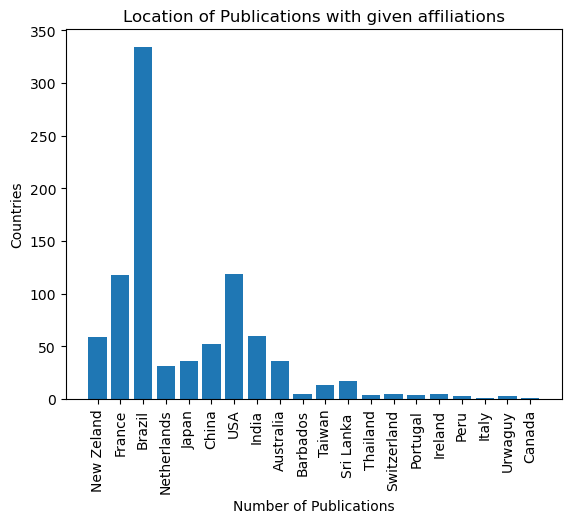

In [37]:
bars=country["Country"]
heights=country["Number "]
y_pos=range(len(bars))
plt.bar(y_pos,heights)
plt.xticks(y_pos,bars,rotation=90)
plt.xlabel('Number of Publications')
plt.ylabel('Countries')
plt.title('Location of Publications with given affiliations')

plt.show()